In [1]:
import pandas as pd
import os
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Patch
import seaborn as sns

from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
eshop = pd.read_csv('C:\Asus WebStorage\psabin@gmail.com\MySyncFolder\Data Science Course\E-Commerce\Sample-Superstore3.csv')
path = r'C:\\Asus WebStorage\\psabin@gmail.com\\MySyncFolder\\Data Science Course\\E-Commerce\\'
eshop_db = sqlite3.connect('eshop_database.db')
c = eshop_db.cursor()

In [8]:
display(eshop.describe())

,row_id,postal_code,sales,quantity,discount,profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


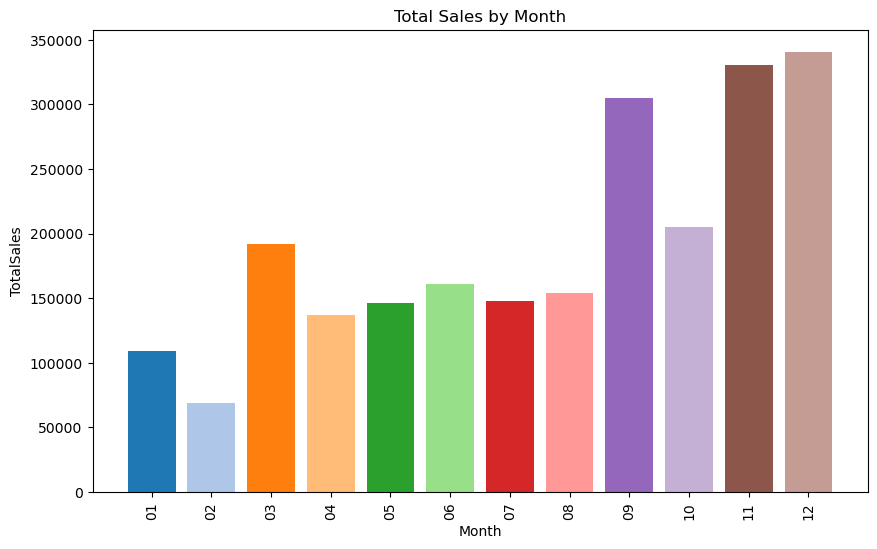

In [9]:
# Execute the query
c.execute('''
SELECT 
    strftime('%m', OrderDate) AS Month, ROUND(SUM(Sales),2) AS TotalSales
FROM 
    OrderDetails
JOIN Orders ON Orders.OrderID=OrderDetails.OrderID          
GROUP BY 
    strftime('%m', OrderDate);''')

# Fetch the results
results = c.fetchall()

# Convert to DataFrame
df = pd.DataFrame(results, columns=['Month', 'TotalSales'])

# Get colors from the 'tab20' colormap
colors = plt.colormaps.get_cmap('tab20')

# Create a bar chart with 'Accent' colors
plt.figure(figsize=(10,6))
plt.bar(df['Month'], df['TotalSales'], color=[colors(i % 12) for i in range(len(df))])
plt.xlabel('Month')
plt.ylabel('TotalSales')
plt.xticks(rotation=90)
plt.title('Total Sales by Month')

plt.show()

December, November, September, October, March are the strongest sales months

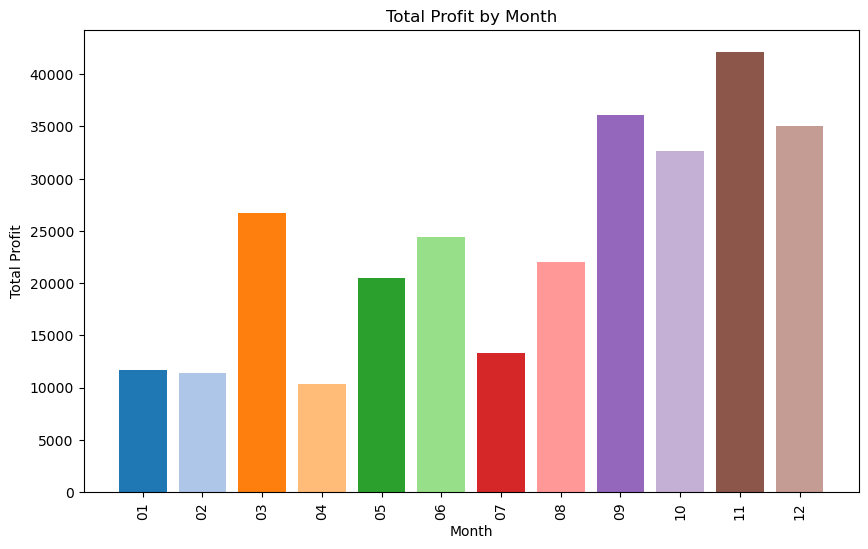

In [10]:
# Execute the query
c.execute('''
SELECT 
    strftime('%m', OrderDate) AS Month, ROUND(SUM(Profit),2) AS TotalProfit
FROM 
    OrderDetails
JOIN Orders ON Orders.OrderID=OrderDetails.OrderID          
GROUP BY 
    strftime('%m', OrderDate);''')

# Fetch the results
results = c.fetchall()

# Convert to DataFrame
df = pd.DataFrame(results, columns=['Month', 'TotalProfit'])

# Get colors from the 'tab20' colormap
colors = plt.colormaps.get_cmap('tab20')

# Create a bar chart with 'Accent' colors
plt.figure(figsize=(10,6))
plt.bar(df['Month'], df['TotalProfit'], color=[colors(i % 12) for i in range(len(df))])
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.title('Total Profit by Month')

plt.show()

In [11]:
c = eshop_db.cursor()

In [12]:
# Execute the query
c.execute('''
SELECT Orders.CustomerID, SUM(Sales) AS TotalSpent, COUNT(ProductID) AS ItemsBought, State, Segment
FROM Orders
JOIN OrderDetails ON Orders.OrderID=OrderDetails.OrderID
JOIN Addresses ON Addresses.AddressID=Orders.AddressID
JOIN Customers on Customers.CustomerID=Orders.CustomerID          
GROUP BY Orders.CustomerID
ORDER BY SUM(Sales) DESC''')

# Fetch the results
results = c.fetchall()

# Convert to DataFrame
df = pd.DataFrame(results, columns=['CustomerID', 'TotalSpent', 'ItemsBought', 'State', 'Segment'])

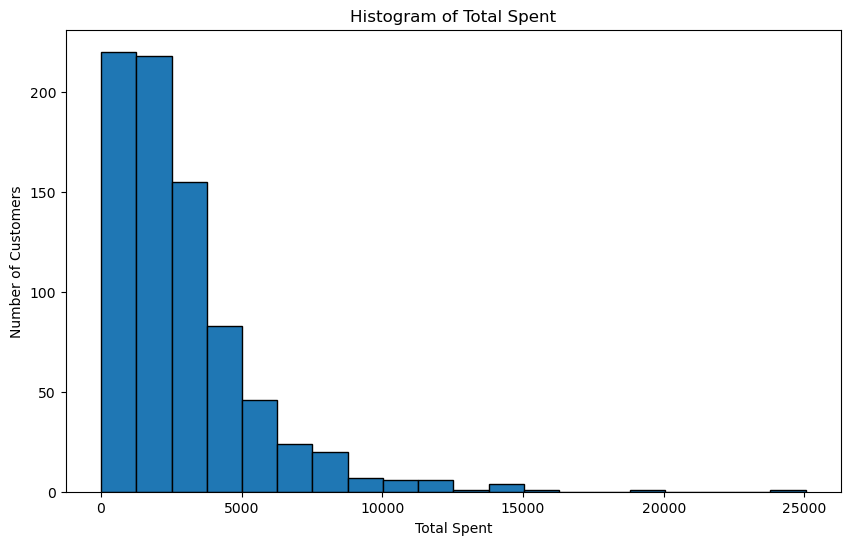

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['TotalSpent'], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Number of Customers')
plt.show()


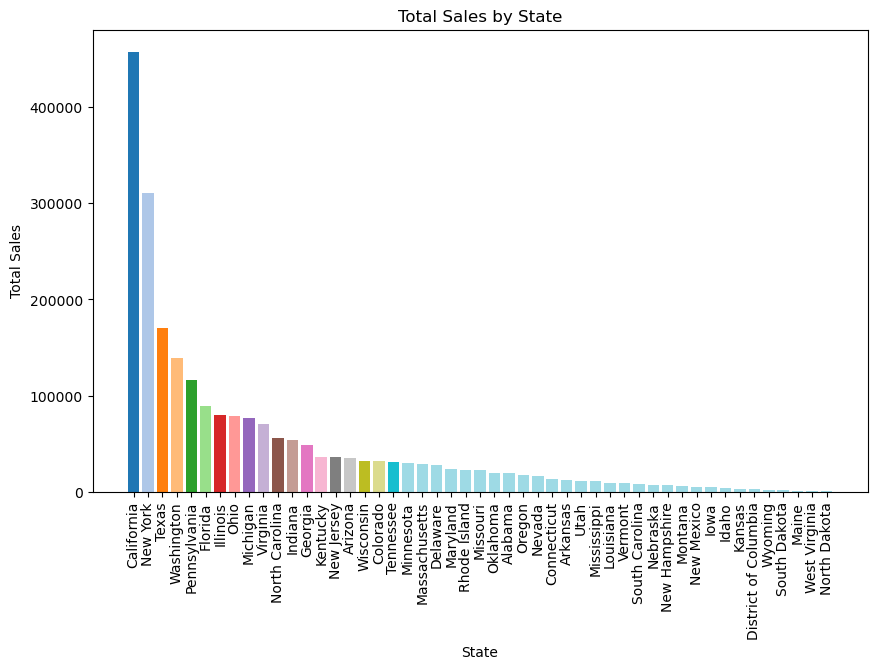

In [14]:


# Execute the query
c.execute('''
SELECT CustomerID, ROUND(SUM(Sales),2) AS TotalSpent, COUNT(ProductID) AS ItemsBought, State
FROM Orders
JOIN OrderDetails ON Orders.OrderID=OrderDetails.OrderID
JOIN Addresses ON Addresses.AddressID=Orders.AddressID
GROUP BY Addresses.State
ORDER BY SUM(Sales) DESC;''')

# Fetch the results
results = c.fetchall()

# Convert to DataFrame
df = pd.DataFrame(results, columns=['CustomerID', 'TotalSpent', 'ItemsBought', 'State'])

# Get colors from the 'tab20' colormap
colors = plt.colormaps.get_cmap('tab20')

# Create a bar chart with 'Accent' colors
plt.figure(figsize=(10,6))
plt.bar(df['State'], df['TotalSpent'], color=[colors(i % 49) for i in range(len(df))])
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.title('Total Sales by State')

plt.show()

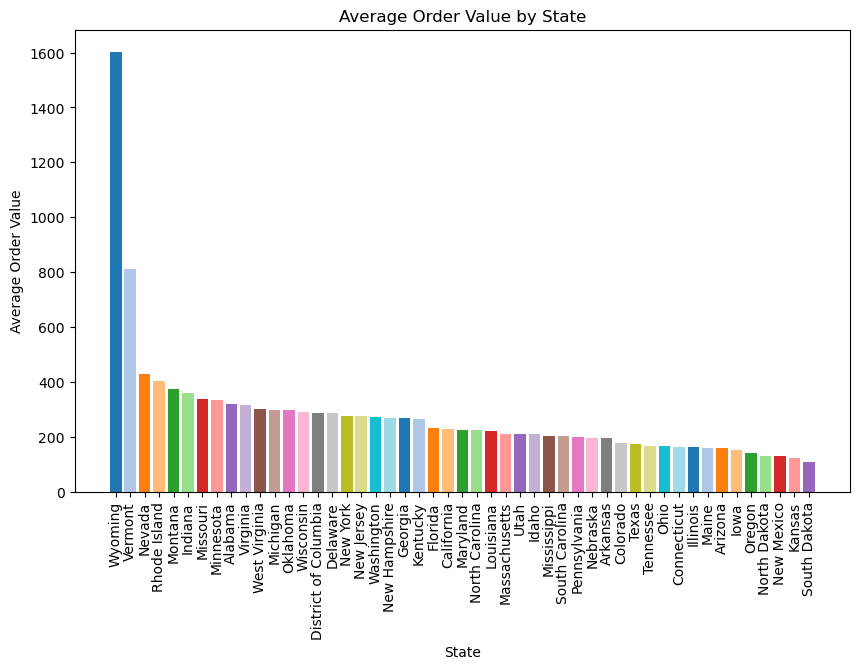

In [15]:

# Execute the query
c.execute('''
SELECT ROUND(SUM(Sales),2) AS SumOfSales, COUNT(OrderDetails.OrderID) AS NumberOfOrders, ROUND(SUM(Sales)/COUNT(OrderDetails.OrderID),2) AS AverageOrderValue, State
FROM Orders
JOIN OrderDetails ON Orders.OrderID=OrderDetails.OrderID
JOIN Addresses ON Addresses.AddressID=Orders.AddressID
GROUP BY State
ORDER BY AverageOrderValue DESC;''')

# Fetch the results
results = c.fetchall()

# Convert to DataFrame
df = pd.DataFrame(results, columns=['SumOfSales', 'NumberOfOrders', 'AverageOrderValue', 'State'])

# Get colors from the 'tab20' colormap
colors = plt.colormaps.get_cmap('tab20')

# Create a bar chart with 'Accent' colors
plt.figure(figsize=(10,6))
plt.bar(df['State'], df['AverageOrderValue'], color=[colors(i % 20) for i in range(len(df))])
plt.xlabel('State')
plt.ylabel('Average Order Value')
plt.xticks(rotation=90)
plt.title('Average Order Value by State')

plt.show()

In [16]:
display(round(sum(eshop['sales'])))

2297201

In [17]:
c.close()

In [18]:
eshop['ship_date'] = pd.to_datetime(eshop['ship_date']).dt.strftime('%Y-%m-%d')

In [19]:
new_orders = pd.read_csv('C:\Asus WebStorage\psabin@gmail.com\MySyncFolder\Data Science Course\E-Commerce\Orders.csv')

In [20]:
new_orders.rename({'OrderDate': 'FalseOrderDate'}, axis='columns', inplace=True)

In [21]:
new_orders['OrderDate'] = eshop['order_date']

In [22]:
new_orders.drop(['FalseOrderDate'], axis=1, inplace=True)

In [23]:
new_orders.to_csv('Ord.csv')

In [24]:
df_monetary = eshop.groupby('customer_id', as_index=False)['sales'].sum()
df_monetary.head()

,customer_id,sales
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5086.935
4,AB-10015,886.156


In [25]:
df_frequency = eshop.groupby('customer_id', as_index=False)['order_id'].count()
df_frequency.head()

,customer_id,order_id
0,AA-10315,11
1,AA-10375,15
2,AA-10480,12
3,AA-10645,18
4,AB-10015,6


In [26]:
# Assuming eshop is your existing DataFrame and 'order_date' is in a suitable format
df_recency = eshop.groupby('customer_id')['order_date'].max().reset_index()
df_recency['recency'] = (pd.Timestamp('2017-12-31') - pd.to_datetime(df_recency['order_date'])).dt.days

# Now df_recency contains each customer's ID and the number of days since their last order as of 2017-12-31



In [27]:
df_recency.drop(['order_date'], axis=1, inplace=True)
df_recency.head()

,customer_id,recency
0,AA-10315,185
1,AA-10375,20
2,AA-10480,260
3,AA-10645,56
4,AB-10015,416


In [28]:
# Assuming df_monetary and df_frequency are already defined and have a 'customer_id' column

# Merging df_recency and df_monetary
customer_patterns = pd.merge(df_recency, df_monetary, on='customer_id', how='inner')

# Merging the result with df_frequency
customer_patterns = pd.merge(customer_patterns, df_frequency, on='customer_id', how='inner')

# Now customer_patterns contains combined data from all three DataFrames


In [29]:
display(customer_patterns.info())
display(customer_patterns.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  793 non-null    object 
 1   recency      793 non-null    int64  
 2   sales        793 non-null    float64
 3   order_id     793 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 24.9+ KB


None

,customer_id,recency,sales,order_id
0,AA-10315,185,5563.560,11
1,AA-10375,20,1056.390,15
2,AA-10480,260,1790.512,12
3,AA-10645,56,5086.935,18
4,AB-10015,416,886.156,6


In [30]:
customer_patterns.rename({'sales': 'monetary', 'order_id':'frequency'}, axis='columns', inplace=True)
display(customer_patterns.head())

,customer_id,recency,monetary,frequency
0,AA-10315,185,5563.560,11
1,AA-10375,20,1056.390,15
2,AA-10480,260,1790.512,12
3,AA-10645,56,5086.935,18
4,AB-10015,416,886.156,6


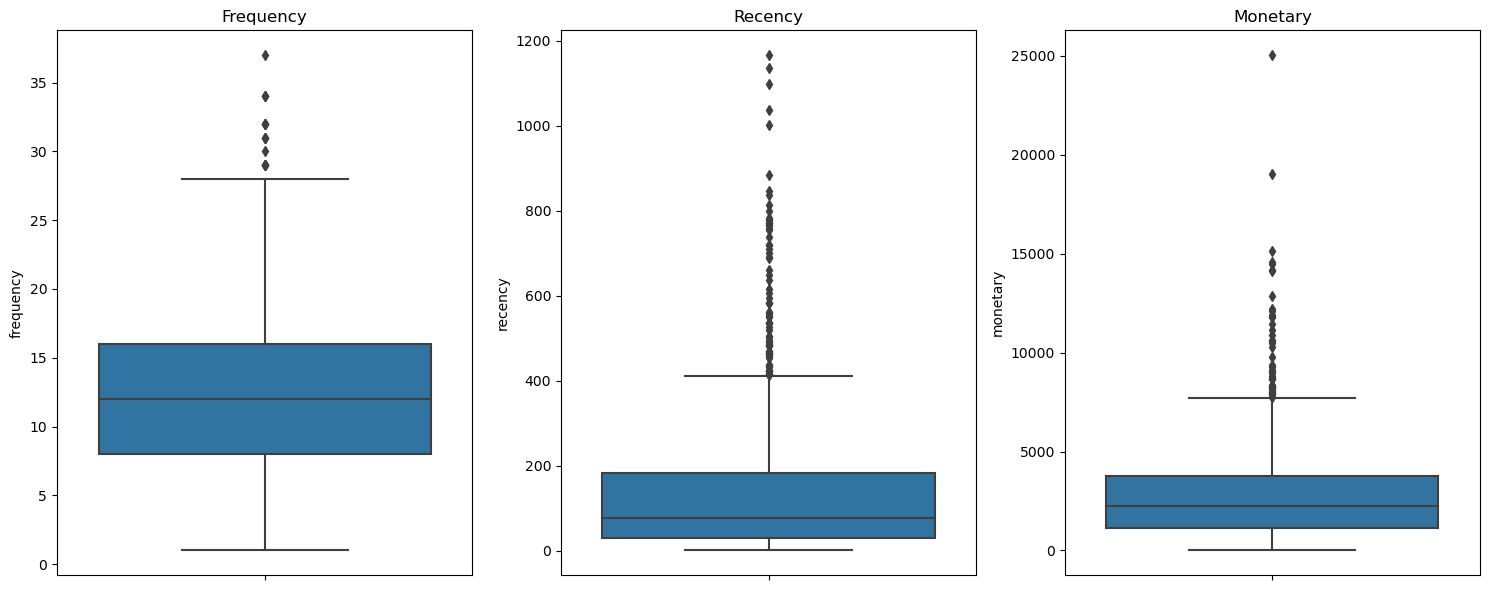

In [31]:
# Assuming customer_patterns DataFrame has columns 'frequency', 'recency', and 'monetary'
plt.figure(figsize=(15, 6))

# Boxplot for frequency
plt.subplot(1, 3, 1)
sns.boxplot(y=customer_patterns['frequency'])
plt.title('Frequency')

# Boxplot for recency
plt.subplot(1, 3, 2)
sns.boxplot(y=customer_patterns['recency'])
plt.title('Recency')

# Boxplot for monetary
plt.subplot(1, 3, 3)
sns.boxplot(y=customer_patterns['monetary'])
plt.title('Monetary')

plt.tight_layout()
plt.show()


In [32]:
# Select only numeric columns for IQR calculation
numeric_cols = customer_patterns.select_dtypes(include=['number'])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers in numeric columns
filtered_customer_patterns = customer_patterns[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]


In [33]:
display(filtered_customer_patterns.info())
customer_patterns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 0 to 792
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  668 non-null    object 
 1   recency      668 non-null    int64  
 2   monetary     668 non-null    float64
 3   frequency    668 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 26.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  793 non-null    object 
 1   recency      793 non-null    int64  
 2   monetary     793 non-null    float64
 3   frequency    793 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 24.9+ KB


In [34]:
from sklearn.preprocessing import StandardScaler
# Rescaling the attributes
rfm_df = filtered_customer_patterns[['monetary', 'frequency','recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['monetary', 'frequency','recency']
rfm_df_scaled.head()

,monetary,frequency,recency
0,1.815723,-0.261677,0.876012
1,-0.863557,0.472007,-0.812704
2,-0.427160,-0.078256,1.643610
3,1.532394,1.022270,-0.444257
4,-0.916868,-0.078256,-0.587542


In [35]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

In [36]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)
# Assign the labels to each data point, and execute the following script.
from collections import Counter
kmeans.labels_
label_list=kmeans.labels_
sorted(Counter(label_list).items())

c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[(0, 208), (1, 247), (2, 103), (3, 110)]

c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

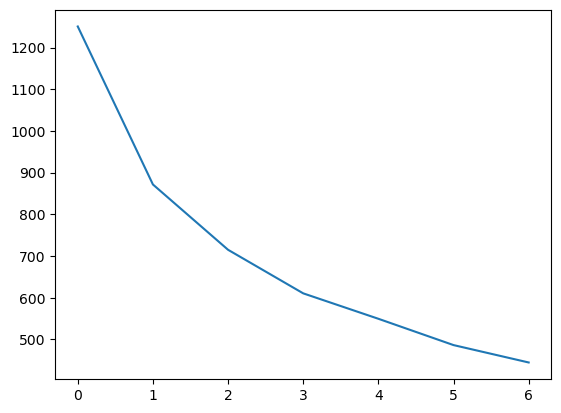

In [37]:
# Elbow-curve /SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)

In [38]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=2, the silhouette score is 0.3400103700052583


c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=3, the silhouette score is 0.3628036419563517


c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=4, the silhouette score is 0.31752988413728256


c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=5, the silhouette score is 0.3298273853514205


c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=6, the silhouette score is 0.27707683026720414


c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=7, the silhouette score is 0.27534881743101614


c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=8, the silhouette score is 0.2753223302922485


Silhouette score is closest to 1 with 3 clusters, so we'll go with that.

In [39]:
# k-means with 3 clusters
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

# Assign the labels to each data point, and execute the following script.
kmeans.labels_
label_list=kmeans.labels_
sorted(Counter(label_list).items())

c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[(0, 250), (1, 103), (2, 315)]

In [40]:
# assign the label
filtered_customer_patterns['cluster_id'] = kmeans.labels_
filtered_customer_patterns.head()

C:\Users\psabi\AppData\Local\Temp\ipykernel_27904\3195040058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_customer_patterns['cluster_id'] = kmeans.labels_


,customer_id,recency,monetary,frequency,cluster_id
0,AA-10315,185,5563.560,11,0
1,AA-10375,20,1056.390,15,2
2,AA-10480,260,1790.512,12,1
3,AA-10645,56,5086.935,18,0
7,AB-10150,42,966.710,12,2


In [41]:
filtered_customer_patterns['monetary'] = round(filtered_customer_patterns['monetary'],2)
filtered_customer_patterns.head()

C:\Users\psabi\AppData\Local\Temp\ipykernel_27904\1451623222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_customer_patterns['monetary'] = round(filtered_customer_patterns['monetary'],2)


,customer_id,recency,monetary,frequency,cluster_id
0,AA-10315,185,5563.56,11,0
1,AA-10375,20,1056.39,15,2
2,AA-10480,260,1790.51,12,1
3,AA-10645,56,5086.93,18,0
7,AB-10150,42,966.71,12,2


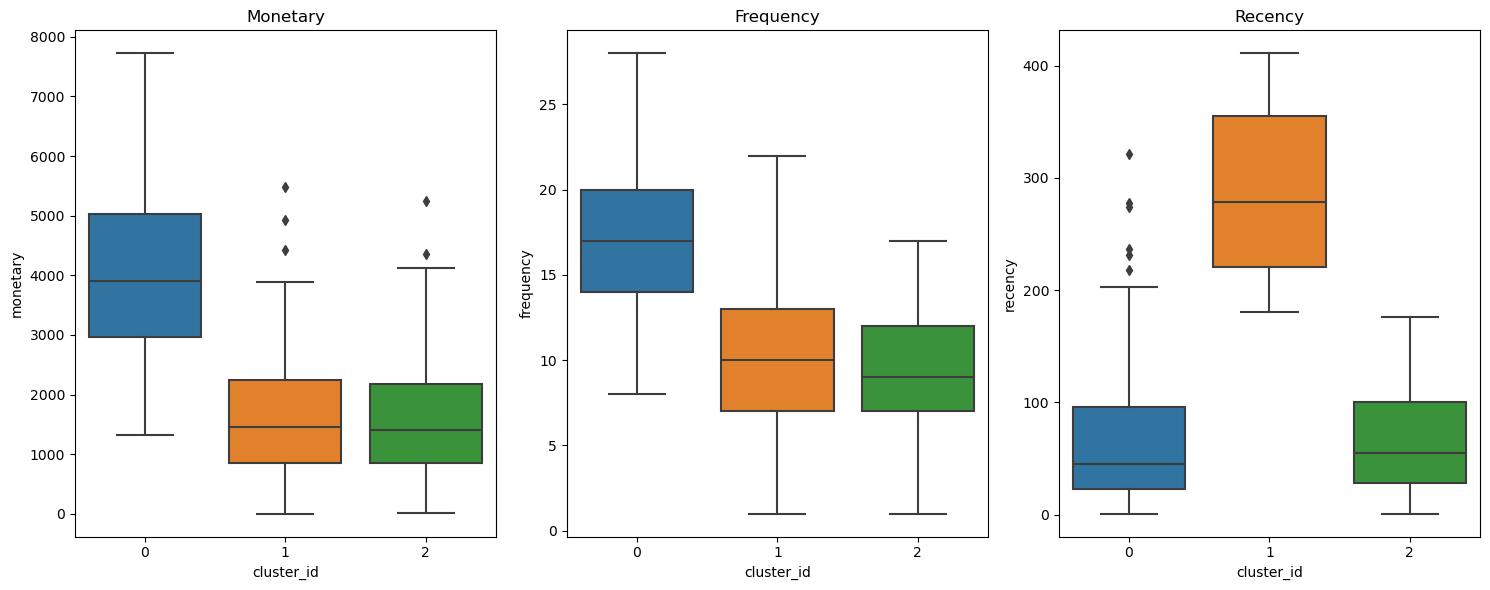

In [42]:

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id', y='monetary', data=filtered_customer_patterns)
plt.title('Monetary')


plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id', y='frequency', data=filtered_customer_patterns)
plt.title('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id', y='recency', data=filtered_customer_patterns)
plt.title('Recency')

plt.tight_layout()
plt.show()


Cluster 0 = High spend, frequent, recent = "Frequent Buyers"


Cluster 1 = Low spend, medium frequency, not recent = "Lapsed"


Cluster 2 = low spend, medium frequency, recent = "New Customers"

In [43]:
filtered_customer_patterns.to_csv('filtered_customer_patterns.csv', index=False)
